In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [106]:
customer_data= pd.read_csv('AdvWorksCusts.csv')
amount_spent=pd.read_csv('AW_AveMonthSpend.csv')
bike_buyer=pd.read_csv('AW_BikeBuyer.csv')
print(customer_data)
print(amount_spent)
print(bike_buyer)

       CustomerID Title  FirstName MiddleName    LastName Suffix  \
0           11000   NaN        Jon          V        Yang    NaN   
1           11001   NaN     Eugene          L       Huang    NaN   
2           11002   NaN      Ruben        NaN      Torres    NaN   
3           11003   NaN    Christy        NaN         Zhu    NaN   
4           11004   NaN  Elizabeth        NaN     Johnson    NaN   
...           ...   ...        ...        ...         ...    ...   
16514       13121   NaN    Latasha          E     Jimenez    NaN   
16515       26100   NaN      James     Garner  Ptaszynski    NaN   
16516       11328   NaN     Julian          M     Griffin    NaN   
16517       23077   NaN     Marvin          A   Hernandez    NaN   
16518       18982   NaN       Kyle        NaN       Baker    NaN   

              AddressLine1 AddressLine2         City StateProvinceName  ...  \
0          3761 N. 14th St          NaN  Rockhampton        Queensland  ...   
1               2243 W St

<b>First and foremost we will add the column containg AveMonthSpend from the amount_spent data file to our customer_data data frame</b>

In [107]:
customer_data['AveMonthSpend']=amount_spent['AveMonthSpend']
print(customer_data)

       CustomerID Title  FirstName MiddleName    LastName Suffix  \
0           11000   NaN        Jon          V        Yang    NaN   
1           11001   NaN     Eugene          L       Huang    NaN   
2           11002   NaN      Ruben        NaN      Torres    NaN   
3           11003   NaN    Christy        NaN         Zhu    NaN   
4           11004   NaN  Elizabeth        NaN     Johnson    NaN   
...           ...   ...        ...        ...         ...    ...   
16514       13121   NaN    Latasha          E     Jimenez    NaN   
16515       26100   NaN      James     Garner  Ptaszynski    NaN   
16516       11328   NaN     Julian          M     Griffin    NaN   
16517       23077   NaN     Marvin          A   Hernandez    NaN   
16518       18982   NaN       Kyle        NaN       Baker    NaN   

              AddressLine1 AddressLine2         City StateProvinceName  ...  \
0          3761 N. 14th St          NaN  Rockhampton        Queensland  ...   
1               2243 W St

<b>We will merge the bike_buyer feature with our customer_data data frame as a new column</b>

In [108]:
customer_data['BikeBuyer']=bike_buyer['BikeBuyer']
print(customer_data)

       CustomerID Title  FirstName MiddleName    LastName Suffix  \
0           11000   NaN        Jon          V        Yang    NaN   
1           11001   NaN     Eugene          L       Huang    NaN   
2           11002   NaN      Ruben        NaN      Torres    NaN   
3           11003   NaN    Christy        NaN         Zhu    NaN   
4           11004   NaN  Elizabeth        NaN     Johnson    NaN   
...           ...   ...        ...        ...         ...    ...   
16514       13121   NaN    Latasha          E     Jimenez    NaN   
16515       26100   NaN      James     Garner  Ptaszynski    NaN   
16516       11328   NaN     Julian          M     Griffin    NaN   
16517       23077   NaN     Marvin          A   Hernandez    NaN   
16518       18982   NaN       Kyle        NaN       Baker    NaN   

              AddressLine1 AddressLine2         City StateProvinceName  ...  \
0          3761 N. 14th St          NaN  Rockhampton        Queensland  ...   
1               2243 W St



<b>First we convert any '-' present to '_' as '-' causes issues when python tries to read</b>

In [109]:
customer_data.columns = [str.replace('-', '_') for str in customer_data.columns]

# Removing columns with missing values

In [110]:
for col in customer_data.columns:
    if customer_data[col].dtype == object:
        count = 0
        count = [count + 1 for x in customer_data[col] if pd.isna(x)]
        print(col + ' ' + str(sum(count)))

Title 16431
FirstName 0
MiddleName 6985
LastName 0
Suffix 16517
AddressLine1 0
AddressLine2 16243
City 0
StateProvinceName 0
CountryRegionName 0
PostalCode 0
PhoneNumber 0
BirthDate 0
Education 0
Occupation 0
Gender 0
MaritalStatus 0


<b>Clearly columns Title, MiddleName, Suffix and Addressline2 have a lot of missing values so we need to drop them out to prevent causing problems in the machine learning model </b>

In [111]:
customer_data.drop(['Title','MiddleName','Suffix','AddressLine2'],axis = 1, inplace = True)
print(customer_data)

       CustomerID  FirstName    LastName         AddressLine1         City  \
0           11000        Jon        Yang      3761 N. 14th St  Rockhampton   
1           11001     Eugene       Huang           2243 W St.      Seaford   
2           11002      Ruben      Torres     5844 Linden Land       Hobart   
3           11003    Christy         Zhu     1825 Village Pl.   North Ryde   
4           11004  Elizabeth     Johnson  7553 Harness Circle   Wollongong   
...           ...        ...         ...                  ...          ...   
16514       13121    Latasha     Jimenez       7259 Birchwood       Melton   
16515       26100      James  Ptaszynski      7345 Kenwal Rd.      Shawnee   
16516       11328     Julian     Griffin  7398 Withersed Lane       Newton   
16517       23077     Marvin   Hernandez       1019 Book Road       Rhodes   
16518       18982       Kyle       Baker      2118 Little Dr.     Kirkland   

      StateProvinceName CountryRegionName PostalCode          P

# Removing duplicate Rows

<b>We know that customer ID uniquely identifies a person, so I will reomve the rows with same customer ID as they are duplicates and might harm my machine learning model</b>

In [112]:
customer_data=customer_data.drop_duplicates(subset='CustomerID',keep='last')


<b> We can see 115 rows were duplicates and are now successfully removed keeping only the last row for each customer
saving us from potential trouble</b>

# Removing columns with only one value

<b>We shall remove the columns with only a single value as they do not contribute any useful information</b>

In [113]:
customer_data = customer_data.loc[:,customer_data.apply(pd.Series.nunique) != 1]
print(customer_data)

       CustomerID  FirstName    LastName         AddressLine1         City  \
0           11000        Jon        Yang      3761 N. 14th St  Rockhampton   
1           11001     Eugene       Huang           2243 W St.      Seaford   
2           11002      Ruben      Torres     5844 Linden Land       Hobart   
3           11003    Christy         Zhu     1825 Village Pl.   North Ryde   
4           11004  Elizabeth     Johnson  7553 Harness Circle   Wollongong   
...           ...        ...         ...                  ...          ...   
16514       13121    Latasha     Jimenez       7259 Birchwood       Melton   
16515       26100      James  Ptaszynski      7345 Kenwal Rd.      Shawnee   
16516       11328     Julian     Griffin  7398 Withersed Lane       Newton   
16517       23077     Marvin   Hernandez       1019 Book Road       Rhodes   
16518       18982       Kyle       Baker      2118 Little Dr.     Kirkland   

      StateProvinceName CountryRegionName PostalCode          P

# Removing columns with too many unique value

In [114]:
print(customer_data.nunique())

CustomerID              16404
FirstName                 662
LastName                  363
AddressLine1            11874
City                      267
StateProvinceName          51
CountryRegionName           6
PostalCode                321
PhoneNumber              7949
BirthDate                7896
Education                   5
Occupation                  5
Gender                      2
MaritalStatus               2
HomeOwnerFlag               2
NumberCarsOwned             5
NumberChildrenAtHome        6
TotalChildren               6
YearlyIncome            15469
AveMonthSpend             152
BikeBuyer                   2
dtype: int64


<b> Clearly 'AddressLine1', 'PhoneNumber', 'BirthDate', 'FirstName', 'LastName','PostalCode','City'  have too many values for a categorical variable, hence we shall drop them </b>

In [115]:
customer_data.drop(['AddressLine1','PhoneNumber','BirthDate','LastName','FirstName','PostalCode','City'], axis = 1, inplace = True)
print(customer_data)

       CustomerID StateProvinceName CountryRegionName        Education  \
0           11000        Queensland         Australia       Bachelors    
1           11001          Victoria         Australia       Bachelors    
2           11002          Tasmania         Australia       Bachelors    
3           11003   New South Wales         Australia       Bachelors    
4           11004   New South Wales         Australia       Bachelors    
...           ...               ...               ...              ...   
16514       13121          Victoria         Australia       Bachelors    
16515       26100  British Columbia            Canada  Partial College   
16516       11328  British Columbia            Canada       Bachelors    
16517       23077   New South Wales         Australia      High School   
16518       18982        Washington     United States      High School   

           Occupation Gender MaritalStatus  HomeOwnerFlag  NumberCarsOwned  \
0        Professional      M     

# Visualizing data for regression

## Bar graphs 

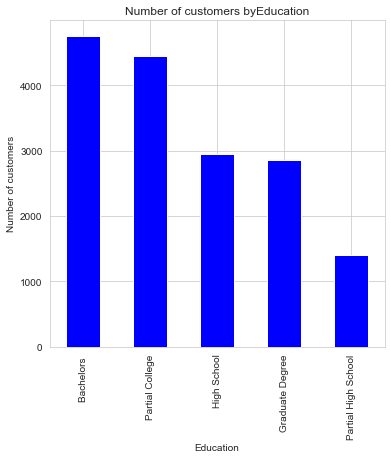

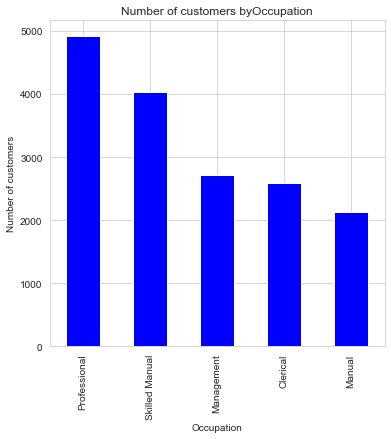

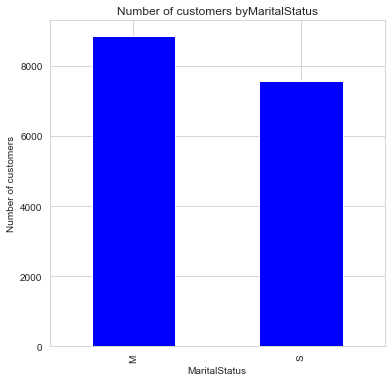

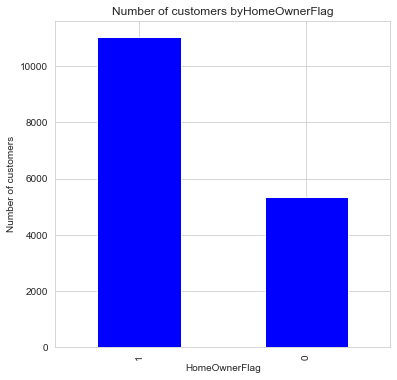

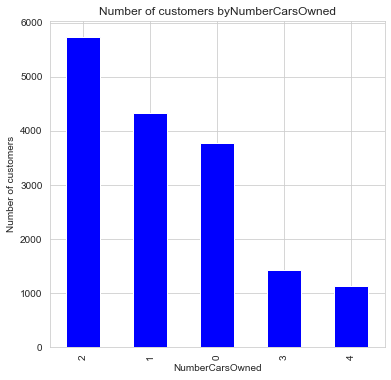

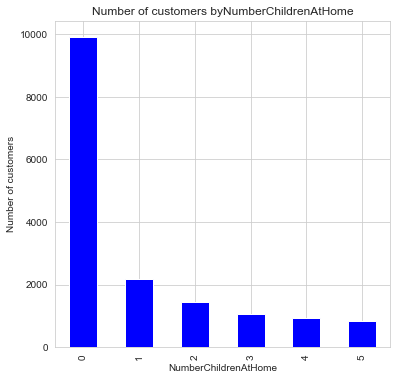

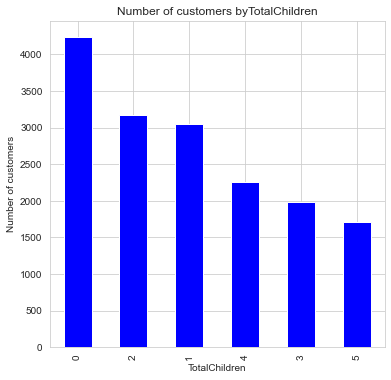

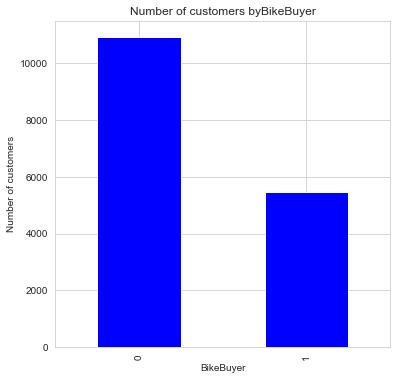

In [120]:
def plot_bars(customer_data, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = customer_data[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of customers by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()

plot_cols=['Education','Occupation','MaritalStatus','HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','BikeBuyer']
plot_bars(customer_data,plot_cols) 

<b> These plots show the wide range of frequencies for the Number of children at home plotted. This will be a problem with modeling, as there are so few members of some classes.</b>

## Histogram

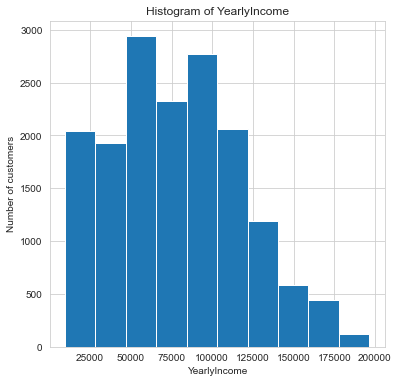

In [95]:
def plot_histogram(customer_data, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        customer_data[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()
        
num_cols = ['YearlyIncome']    
plot_histogram(customer_data, num_cols)

<b> Since this is fairly distrubuted it will be a useful feature</b>

## Scatter Plot

### Transparency

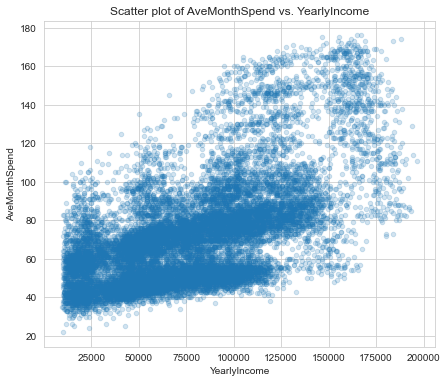

In [96]:
def plot_scatter_t(customer_data, cols, col_y = 'AveMonthSpend', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        customer_data.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter_t(customer_data, num_cols, alpha = 0.2) 

<b>We can see there is some sort of increase in AveMonthSpend with yeatly income but not a linear relation for sure

### Contour

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


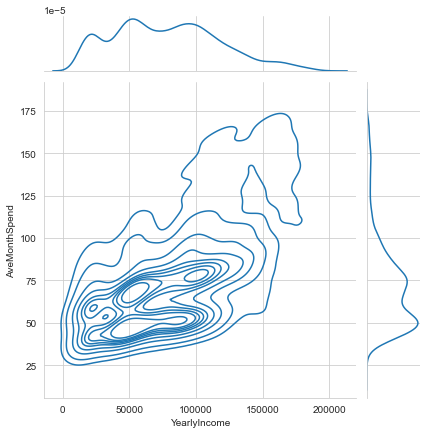

In [97]:
def plot_desity_2d(customer_data, cols, col_y = 'AveMonthSpend', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=customer_data, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(customer_data, num_cols)

<b> same relation as the scatter plot</b>

# Box graphs

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


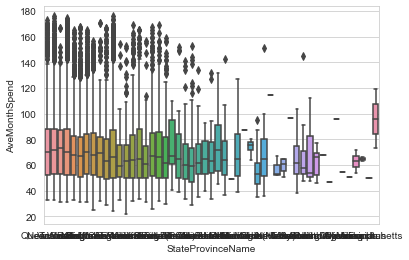

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


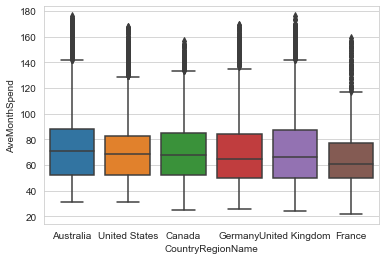

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


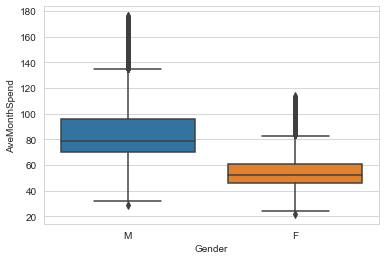

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


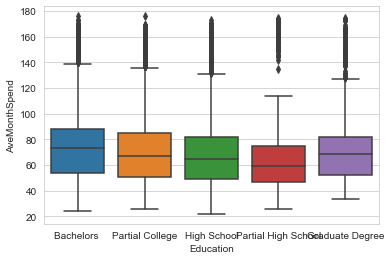

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


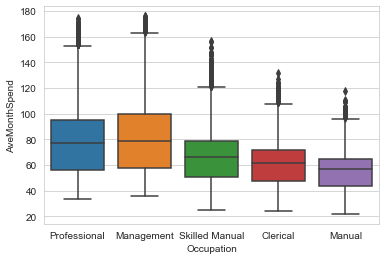

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


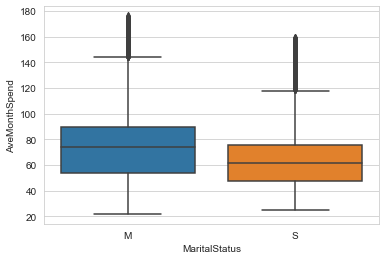

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


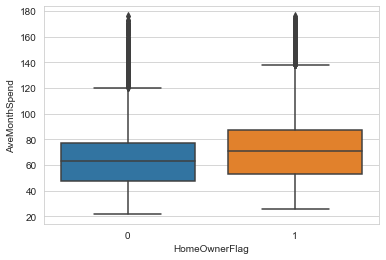

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


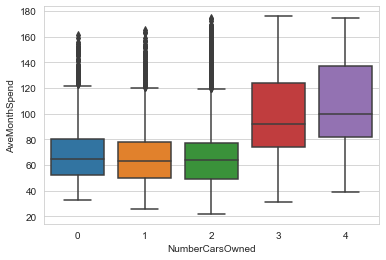

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


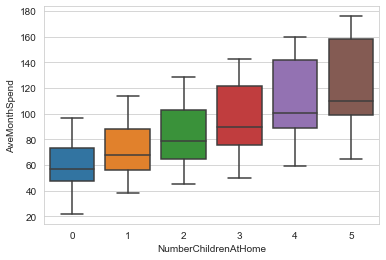

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


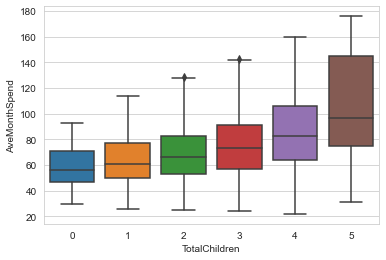

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


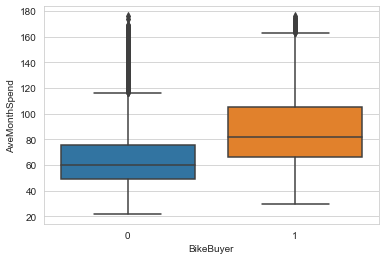

In [98]:
def plot_box(customer_data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=customer_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['StateProvinceName', 'CountryRegionName','Gender','Education','Occupation','MaritalStatus','HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','BikeBuyer']
plot_box(customer_data, cat_cols)    

<b>We can see 'StateProvinceName', 'CountryRegionName' have almost no variation hence they are not varying much

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


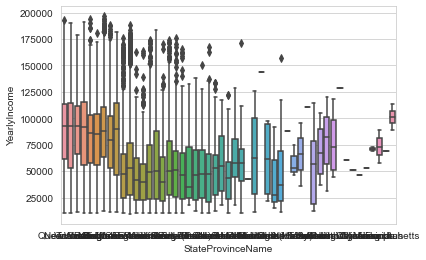

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


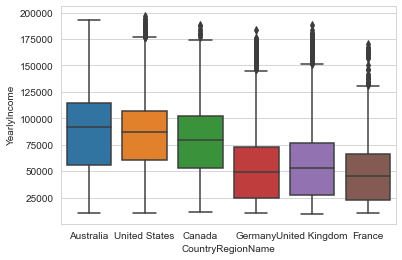

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


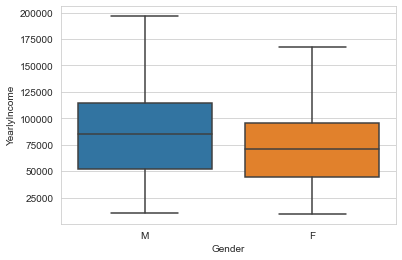

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


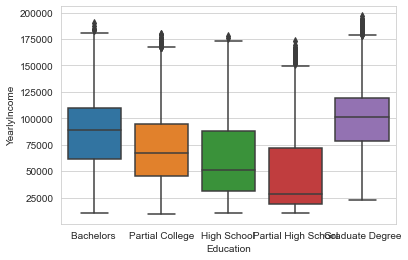

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


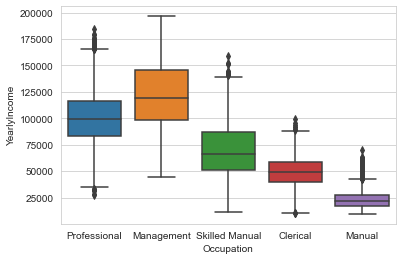

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


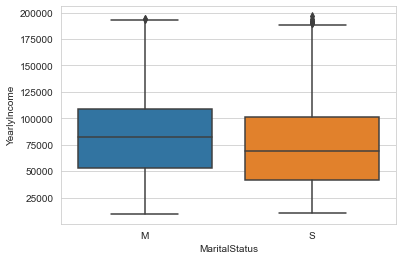

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


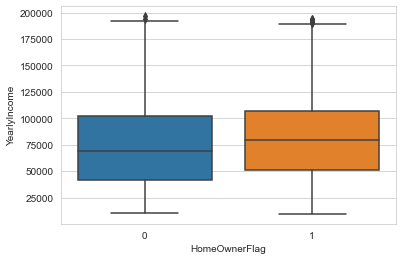

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


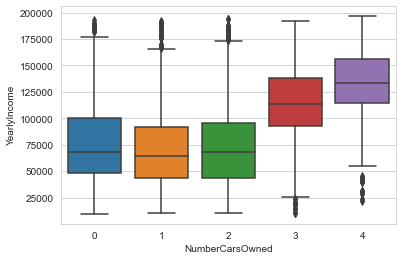

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


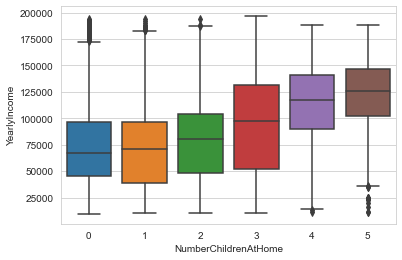

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


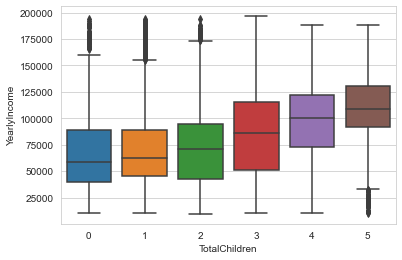

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


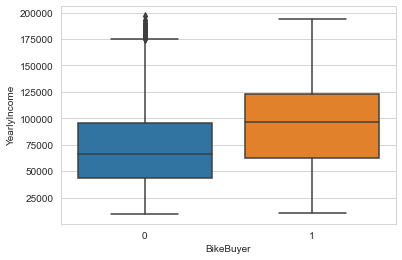

In [118]:
def plot_box(customer_data, cols, col_y = 'YearlyIncome'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=customer_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['StateProvinceName', 'CountryRegionName','Gender','Education','Occupation','MaritalStatus','HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','BikeBuyer']
plot_box(customer_data, cat_cols)

# Violin Plots

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


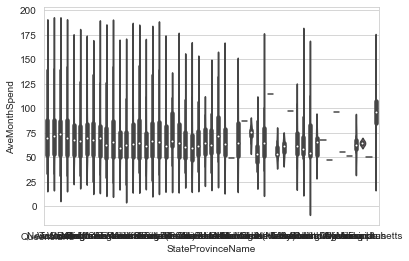

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


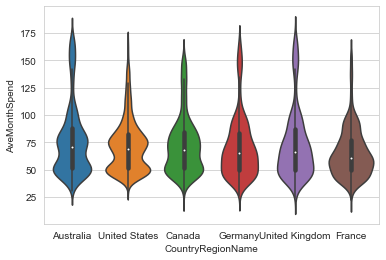

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


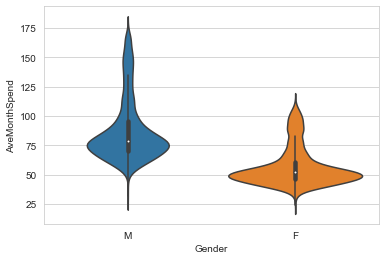

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


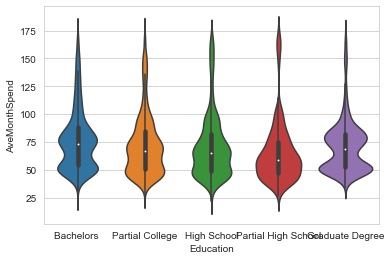

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


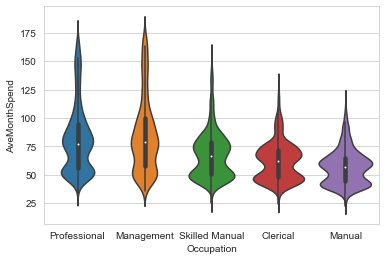

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


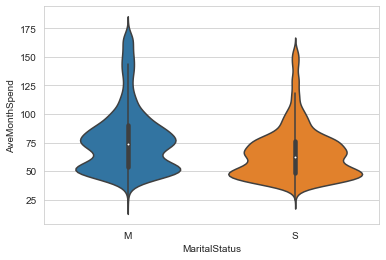

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


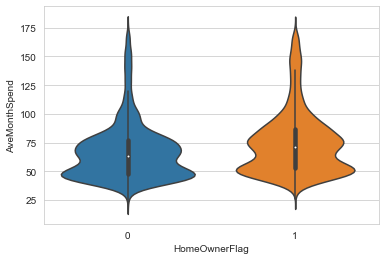

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


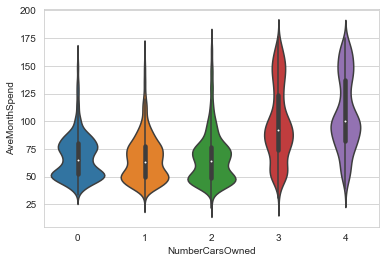

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


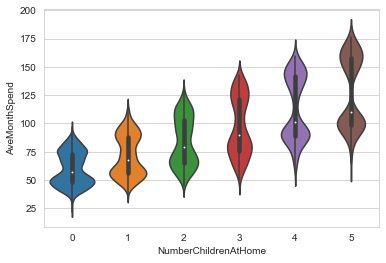

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


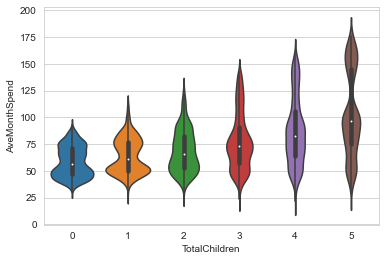

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


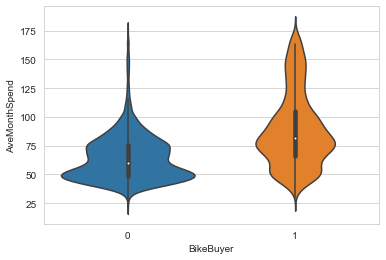

In [99]:
def plot_violin(customer_data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=customer_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(customer_data, cat_cols) 

<b>We can see 'StateProvinceName', 'CountryRegionName','HomeOwnerFlag','MaritalStatus' have almost no variation hence they are not useful and we must drop them

In [100]:
customer_data.drop(['StateProvinceName', 'CountryRegionName','HomeOwnerFlag','MaritalStatus'], axis = 1, inplace = True)
print(customer_data)

       CustomerID        Education      Occupation Gender  NumberCarsOwned  \
0           11000       Bachelors     Professional      M                0   
1           11001       Bachelors     Professional      M                1   
2           11002       Bachelors     Professional      M                1   
3           11003       Bachelors     Professional      F                1   
4           11004       Bachelors     Professional      F                4   
...           ...              ...             ...    ...              ...   
16514       13121       Bachelors     Professional      F                4   
16515       26100  Partial College    Professional      F                2   
16516       11328       Bachelors       Management      M                2   
16517       23077      High School  Skilled Manual      M                2   
16518       18982      High School    Professional      M                2   

       NumberChildrenAtHome  TotalChildren  YearlyIncome  AveMo

<b> Now our data seems to be clean and nice so we can apply our machine learning model</b>

In [101]:
customer_data.to_csv('AdvWorksCustsPrep.csv')

<b>Calculating the averages</b>

In [103]:
print(amount_spent['AveMonthSpend'].min())
print(amount_spent['AveMonthSpend'].mean())
print(amount_spent['AveMonthSpend'].max())
print(amount_spent['AveMonthSpend'].mode())
print(amount_spent['AveMonthSpend'].median())
print(amount_spent['AveMonthSpend'].std())

22
72.40595677704462
176
0    48
dtype: int64
68.0
27.28537049229709
